# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
#!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from api_keys import weather_api_key
from api_keys import g_key


from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [90]:
# Save config information.

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"  # "imperial" for Farenheit; "metric" for Celsius



# Build partial query URL
#query_url = base_url + "appid=" + weather_api_key + "&q=" + cityx
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#create lists
x_city=[]
x_cloudiness=[]
x_country=[]
x_date=[]
x_humidity=[]
x_latitude=[]
x_longitude=[]
x_max_temp=[]
x_wind_speed=[]
record = 0
set = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------------------------")
for index in cities[0:50]:   #https://samples.openweathermap.org/data/2.5/find?q=London&units=metric&appid=439d4b804bc8187953eb36d2a8c26a02
    
    response = requests.get(query_url + index).json() #index is city name, passing to url
    
    try:
        x_city.append(index)
        x_cloudiness.append(response['clouds']['all'])
        x_country.append(response['sys']['country'])
        x_date.append(response['dt'])
        x_humidity.append(response['main']['humidity'])
        x_latitude.append(response['coord']['lon'])
        x_longitude.append(response['coord']['lat'])
        x_max_temp.append(response['main']['temp_max'])
        x_wind_speed.append(response['wind']['speed'])
        print(f"Processing Record {record} of Set {set} | {index}") #*************Count Set********************
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    record += 1
set += 1
print(f"------------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------------")



# for p in x_city:
#      print(p)
    
    
    

Beginning Data Retrieval
-------------------------------------------------
Processing Record 0 of Set 1 | khatanga
City not found. Skipping...
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | kaeo
Processing Record 4 of Set 1 | nikolskoye
City not found. Skipping...
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | znamenskoye
City not found. Skipping...
Processing Record 10 of Set 1 | cape town
City not found. Skipping...
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | humberto de campos
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | buraydah
Processing Record 18 of Set 1 | grand-santi
Processing Record 19 of Set 1 | asfi
Processing Record 20 of Set 1 | beringovskiy
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | dikson
Processing Record 23 of Set 1 | ph

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [85]:
weather_df = {
  
 #   "City": x_city,            *************Error on x_city************                  
    "Cloudiness": x_cloudiness,
    "Country": x_country,
    "Date": x_date,
    "Humidity": x_humidity,
    "Lat": x_latitude,
    "Lng": x_longitude,
    "Max Temp": x_max_temp,
    "Wind Speed": x_wind_speed
}
weather_data = pd.DataFrame(weather_df)
weather_data.count()



Cloudiness    43
Country       43
Date          43
Humidity      43
Lat           43
Lng           43
Max Temp      43
Wind Speed    43
dtype: int64

In [103]:
weather_data.to_csv("Output/city.csv", encoding="utf-8", index=False) #Export cit dataframe to cvs 
weather_data

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,100,RU,1586765141,96,102.50,71.97,23.18,7.14
1,23,RU,1586765141,95,-173.30,64.38,22.03,2.35
2,8,NZ,1586765142,86,173.78,-35.10,61.00,4.00
3,20,RU,1586765142,66,30.79,59.70,52.00,8.95
4,0,AU,1586764895,74,113.63,-24.87,84.20,17.22
5,7,PF,1586765142,75,-134.97,-23.12,77.11,14.12
6,90,RU,1586765143,79,73.83,57.13,46.76,7.02
7,20,ZA,1586764934,77,18.42,-33.93,64.00,2.24
8,90,US,1586765143,92,-156.79,71.29,21.20,6.93
9,75,AU,1586765143,71,147.33,-42.88,57.99,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

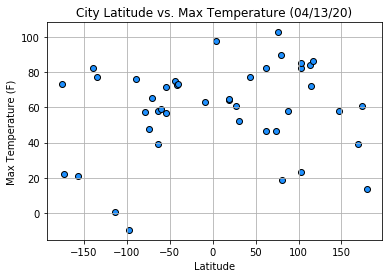

In [98]:
# Build a scatter plot for City Latitude vs. Max Temperature
now = datetime.datetime.now()
analysis_date= now.strftime("%m/%d/%y")

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o",color='dodgerblue', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature" + " (" + str(analysis_date) + ")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude vs. Temperature Plot.png")

# Show plot
plt.show()



#### Latitude vs. Humidity Plot

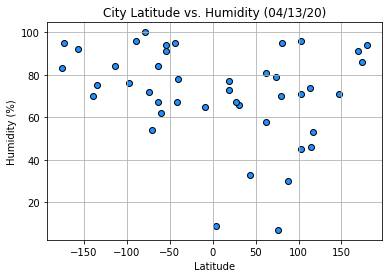

In [99]:
# Build a scatter plot for City Latitude vs. Humidity

plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",color='dodgerblue', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity" + " (" + str(analysis_date) + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude vs. Humidity Plot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

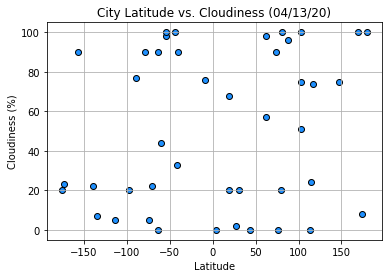

In [100]:
# Build a scatter plot for City Latitude vs. Cloudiness

plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",color='dodgerblue', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness" + " (" + str(analysis_date) + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude vs. Cloudiness Plot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

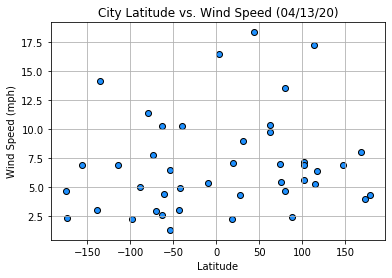

In [101]:
# Build a scatter plot for City Latitude vs. Wind Speed

plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",color='dodgerblue', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed" + " (" + str(analysis_date) + ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [108]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = (weather_data[weather_data['Lat'] >= 0])

southern_df = (weather_data[weather_data['Lat'] < 0])
southern_df

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,23,RU,1586765141,95,-173.30,64.38,22.03,2.35
5,7,PF,1586765142,75,-134.97,-23.12,77.11,14.12
8,90,US,1586765143,92,-156.79,71.29,21.20,6.93
10,100,BR,1586765144,95,-43.46,-2.60,74.73,3.06
12,22,PF,1586765144,70,-139.03,-9.80,82.00,3.02
14,98,GF,1586765144,91,-54.38,4.25,71.37,1.32
15,76,MA,1586765144,65,-9.24,32.30,62.74,5.35
17,20,TO,1586765145,83,-175.20,-21.20,73.40,4.70
24,33,BR,1586765146,67,-42.03,-22.97,72.63,4.88
25,0,BO,1586765146,67,-63.47,-18.83,58.06,2.62


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.10038202149610002


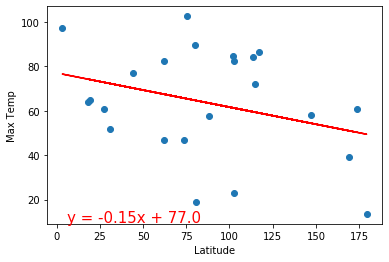

In [137]:
# Add the linear regression equation and line to plot
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.08433289362083198


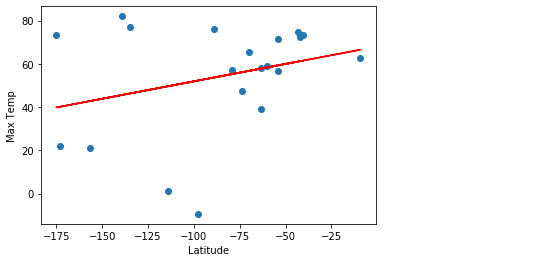

In [138]:
# Add the linear regression equation and line to plot
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1532044424357447


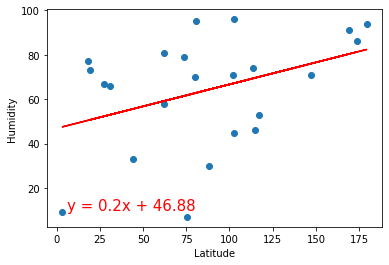

In [139]:
# Add the linear regression equation and line to plot
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07050440454839005


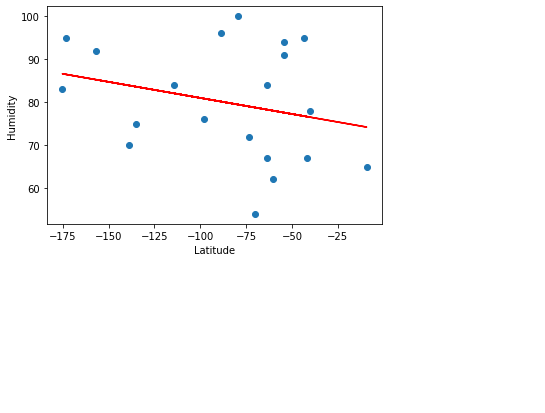

In [142]:
# Add the linear regression equation and line to plot
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()                                           #*******************y = ...not showing***********************


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression